### Data Collecting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#membuat data file ke DataFrame
df = pd.read_csv('goalkeeper1.csv', delimiter=';')
df

,id_player,player,nation,klub,age,competition,OPA
0,1,Alisson,Brazil,Liverpool,29,Premier League,89
1,2,Alphonse Aerola,France,West Ham,29,Premier League,1
2,3,Kepa Arrizabalaga,Spain,Chelsea,27,Premier League,52
3,4,Gavin Bazunu,Ireland,Southampton,20,Premier League,48
4,5,Asmir Begovic,Bosnia and Herzegovina,Everton,35,Premier League,0
...,...,...,...,...,...,...,...
161,163,Martin Turk,Slovenia,Sampdoria,18,SerieA,2
162,164,Samir Ujkani,Kosovo,Empoli,34,SerieA,0
163,165,Guglielmo Vicaro,Italy,Empoli,25,SerieA,22
164,166,Jeroen Zoet,Netherlands,Spezia,31,SerieA,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_player    166 non-null    int64 
 1   player       166 non-null    object
 2   nation       166 non-null    object
 3   klub         166 non-null    object
 4   age          166 non-null    int64 
 5   competition  166 non-null    object
 6   OPA          166 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 9.2+ KB


### Eksplorasi Data Analysis

In [3]:
# memeriksa dimensi data
import numpy as np
np.shape(df)

(166, 7)

In [4]:
df.isnull().any()

id_player      False
player         False
nation         False
klub           False
age            False
competition    False
OPA            False
dtype: bool

In [5]:
#Memeriksa Jenis Data setiap Variabel
df.dtypes

id_player       int64
player         object
nation         object
klub           object
age             int64
competition    object
OPA             int64
dtype: object

In [7]:
df.describe()

,id_player,age,OPA
count,166.000000,166.000000,166.000000
mean,84.265060,28.831325,20.807229
std,48.377326,4.882422,20.705706
min,1.000000,18.000000,0.000000
25%,43.250000,25.000000,3.250000
50%,84.500000,29.000000,16.500000
75%,125.750000,32.000000,32.000000
max,167.000000,41.000000,121.000000


### Klasterisasi OPA

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df1 = df.loc[:, ['player', 'OPA', 'age']]
df1

,player,OPA,age
0,Alisson,89,29
1,Alphonse Aerola,1,29
2,Kepa Arrizabalaga,52,27
3,Gavin Bazunu,48,20
4,Asmir Begovic,0,35
...,...,...,...
161,Martin Turk,2,18
162,Samir Ujkani,0,34
163,Guglielmo Vicaro,22,25
164,Jeroen Zoet,6,31


In [18]:
# mengambil 2 data yang akan diklasterisasi
data = df1.loc[:, ['OPA', 'age']]
data.head(2)

,OPA,age
0,89,29
1,1,29


In [19]:
# convert to numpy array
X = data.values
X

array([[ 89,  29],
       [  1,  29],
       [ 52,  27],
       [ 48,  20],
       [  0,  35],
       [  1,  29],
       [  0,  33],
       [ 33,  28],
       [ 25,  37],
       [ 16,  34],
       [ 32,  31],
       [ 26,  35],
       [ 27,  25],
       [  2,  35],
       [  6,  25],
       [ 11,  29],
       [  0,  23],
       [ 46,  30],
       [ 29,  35],
       [ 73,  29],
       [  7,  32],
       [ 11,  30],
       [ 66,  22],
       [  9,  35],
       [ 25,  33],
       [  3,  32],
       [  7,  29],
       [ 52,  28],
       [ 74,  30],
       [ 43,  24],
       [ 54,  26],
       [  3,  32],
       [  2,  25],
       [ 28,  29],
       [ 13,  24],
       [ 19,  31],
       [  5,  23],
       [ 42,  29],
       [  3,  18],
       [ 10,  21],
       [ 17,  33],
       [ 20,  30],
       [ 39,  31],
       [  6,  39],
       [ 21,  34],
       [ 40,  30],
       [ 52,  28],
       [ 10,  30],
       [ 37,  31],
       [ 15,  24],
       [ 26,  32],
       [  1,  21],
       [ 38,

In [20]:
# kalkulasi WCSS
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [21]:
# implementasi kmeans

def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
        # untuk setiap pengamatan
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist titik dari semua centroid
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
                mn_dist = d
                cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [24]:
# mencari K value dengan metode Elbow

cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

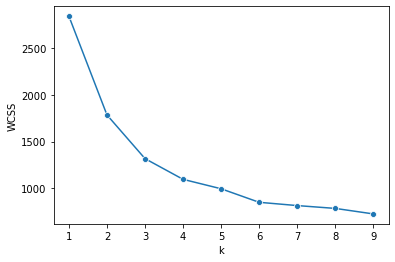

In [25]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [26]:
# membuat klaster
k = 2
centroids, cluster = kmeans(X, k)

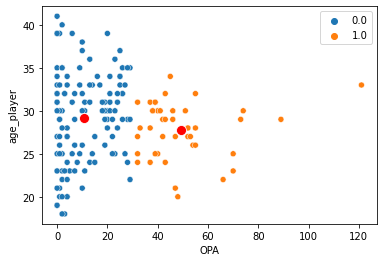

In [27]:
# Visualisasi Klaster
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster)
sns.scatterplot(x=centroids[:,0], y=centroids[:, 1], s=100, color='red')
plt.xlabel('OPA')
plt.ylabel('age_player')
plt.show()

In [28]:
df1['cluster'] = cluster
df1.head(60)

,player,OPA,age,cluster
0,Alisson,89,29,1.0
1,Alphonse Aerola,1,29,0.0
2,Kepa Arrizabalaga,52,27,1.0
3,Gavin Bazunu,48,20,1.0
4,Asmir Begovic,0,35,0.0
5,Daniel Bentley,1,29,0.0
6,Martin Dubravka,0,33,0.0
7,Ederson,33,28,1.0
8,Lukasz Fabianski,25,37,0.0
9,Fraser Forster,16,34,0.0


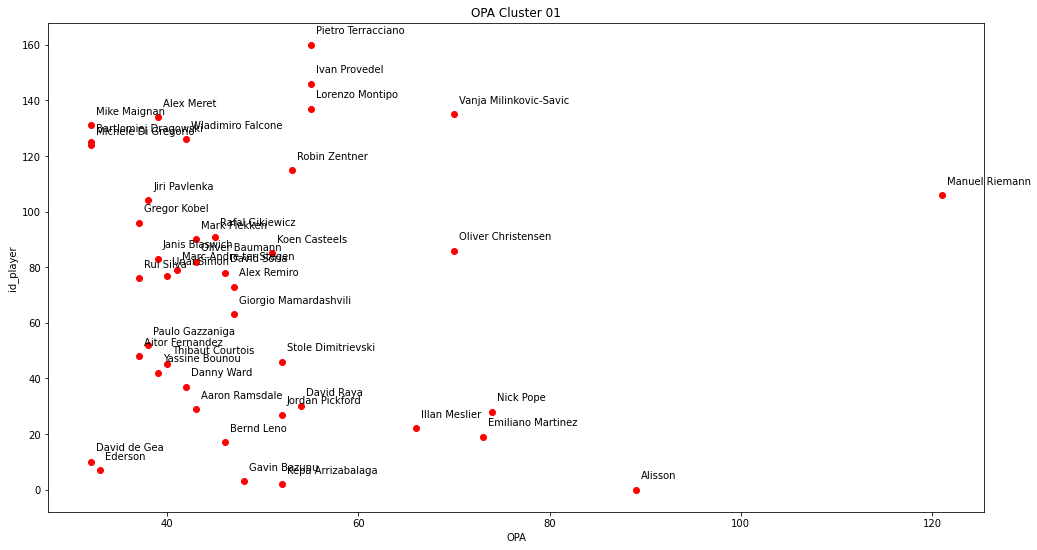

In [31]:
# Filter data for Cluster 1 with OPA > 20
filtered_data = df1[(df1['cluster'] == 1) & (df1['OPA'] > 20)]
plt.figure(figsize=(20, 9))

# Create scatter plot with filtered player names as labels
plt.scatter(filtered_data['OPA'], filtered_data.index, color="red")

for i, player in enumerate(filtered_data['player']):
    x_value = filtered_data.loc[filtered_data['player'] == player, "OPA"].values[0]
    plt.annotate(player, (x_value, filtered_data.index[i]), xytext=(5, 14), textcoords='offset points', ha='left', va='center')

# Set labels and title
plt.xlabel("OPA")
plt.ylabel("id_player")
plt.title("OPA Cluster 01")

# Adjust spacing for player names
plt.subplots_adjust(left=0.25)

# Show the plot
plt.show()

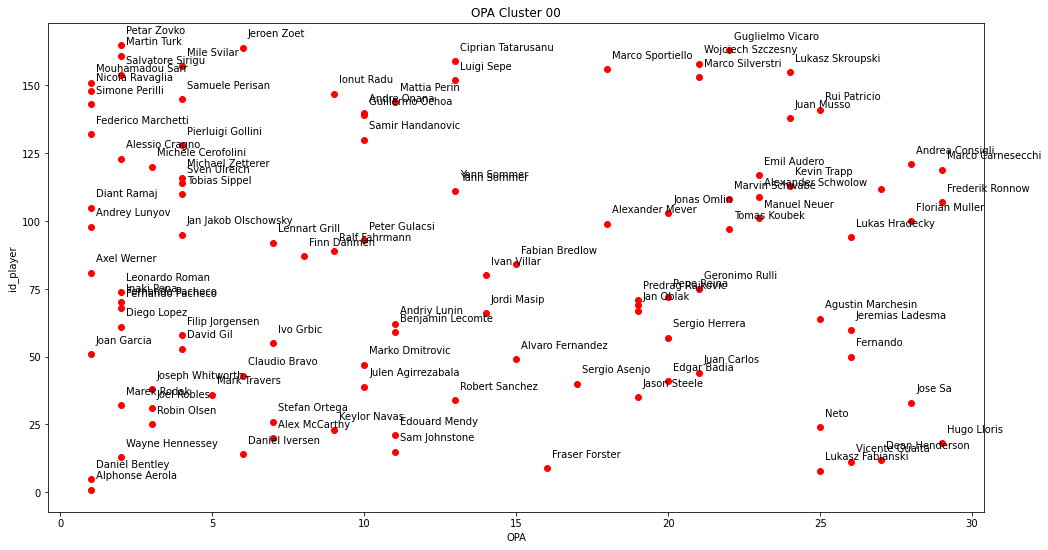

In [58]:
# Filter data for Cluster 0 with OPA > 0
filtered_data = df1[(df1['cluster'] == 0) & (df1['OPA'] > 0)]
plt.figure(figsize=(20, 9))

# Create scatter plot with filtered player names as labels
plt.scatter(filtered_data['OPA'], filtered_data.index, color="red")

for i, player in enumerate(filtered_data['player']):
    x_value = filtered_data.loc[filtered_data['player'] == player, "OPA"].values[0]
    plt.annotate(player, (x_value, filtered_data.index[i]), xytext=(5, 14), textcoords='offset points', ha='left', va='center')

# Set labels and title
plt.xlabel("OPA")
plt.ylabel("id_player")
plt.title("OPA Cluster 00")

# Adjust spacing for player names
plt.subplots_adjust(left=0.25)

# Show the plot
plt.show()

In [35]:
def silhouette_coefficient(X, clusters):
    num_samples = len(X)
    s = 0
    for i in range(num_samples):
        cluster_i = clusters[i]
        cluster_i_samples = X[clusters == cluster_i]
        a = np.mean([np.linalg.norm(X[i] - sample) for sample in cluster_i_samples if sample is not X[i]])

        b_values = []
        unique_clusters = np.unique(clusters)
        for k in unique_clusters:
            if k != cluster_i:
                cluster_k_samples = X[clusters == k]
                b = np.mean([np.linalg.norm(X[i] - sample) for sample in cluster_k_samples])
                b_values.append(b)

        if len(b_values) > 0:
            b = np.min(b_values)
            s += (b - a) / max(a, b)

    if num_samples > 0:
        return s / num_samples
    else:
        return 0.0

# Example usage
silhouette_score = silhouette_coefficient(X, cluster)
print("Silhouette Coefficient:", silhouette_score)

Silhouette Coefficient: 0.5975327248599589


In [36]:
cluster_labels = df1['cluster']
cluster_labels

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
161    0.0
162    0.0
163    0.0
164    0.0
165    0.0
Name: cluster, Length: 166, dtype: float64

In [37]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_labels)

In [38]:
print("Nilai silhouette:", silhouette_avg)

Nilai silhouette: 0.5923881805565666
